# 2022 NZMSA Data Science Submission.

In [304]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

## Numerical

In [305]:
dataset = pd.read_csv("weather-data.csv")

print("Average (mean):")
print(dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].mean())
print("-"*20)
print("Standard deviation:")
print(dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].std())
print("-"*20)
print("10th and 90th percentile range")
percentiles_10th = dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].quantile(0.1)
percentiles_90th = dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].quantile(0.9)
print(percentiles_90th - percentiles_10th)

Average (mean):
tmpc    15.811503
dwpc    12.115772
relh    79.782307
sknt     8.919029
gust    30.962594
dtype: float64
--------------------
Standard deviation:
tmpc     4.235197
dwpc     3.738005
relh    12.562199
sknt     5.348379
gust     6.319510
dtype: float64
--------------------
10th and 90th percentile range
tmpc    10.00
dwpc    10.00
relh    31.14
sknt    13.00
gust    15.00
dtype: float64


## Graphical

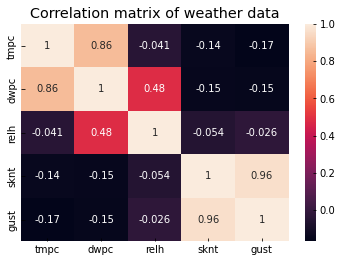

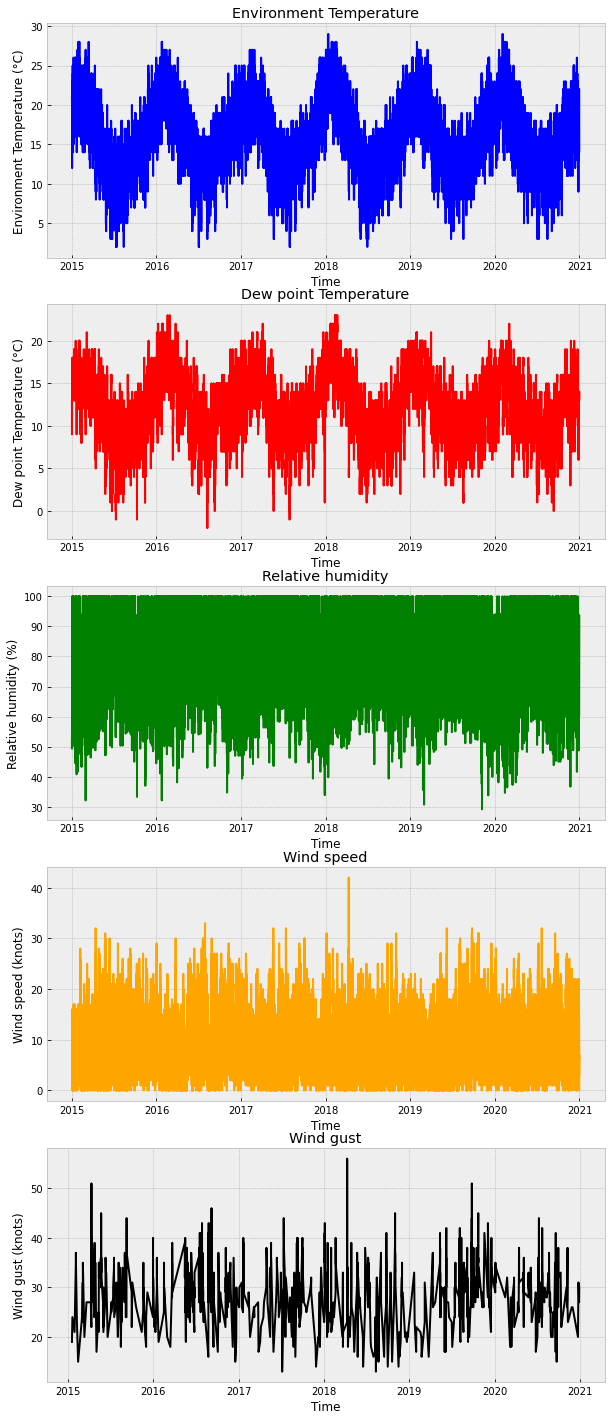

In [307]:
# correlation plot
corrMatrix = dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].dropna().corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation matrix of weather data")
plt.show()

# plot all numerical data
dataset['valid'] = pd.to_datetime(dataset['valid'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce') # convert valid dates to datetime objects
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

tmpc_data = dataset[['valid','tmpc']].dropna()
ax1.plot(tmpc_data["valid"], tmpc_data["tmpc"], color="blue")
ax1.set_title("Environment Temperature")
ax1.set_xlabel("Time")
ax1.set_ylabel("Environment Temperature (°C)")

dwpc_data = dataset[['valid','dwpc']].dropna()
ax2.plot(dwpc_data["valid"], dwpc_data["dwpc"], color="red")
ax2.set_title("Dew point Temperature")
ax2.set_xlabel("Time")
ax2.set_ylabel("Dew point Temperature (°C)")

relh_data = dataset[['valid','relh']].dropna()
ax3.plot(relh_data["valid"], relh_data["relh"], color="green")
ax3.set_title("Relative humidity")
ax3.set_xlabel("Time")
ax3.set_ylabel("Relative humidity (%)")

sknt_data = dataset[['valid','sknt']].dropna()
ax4.plot(sknt_data["valid"], sknt_data["sknt"], color="orange")
ax4.set_title("Wind speed")
ax4.set_xlabel("Time")
ax4.set_ylabel("Wind speed (knots)")

gust_data = dataset[['valid','gust']].dropna()
ax5.plot(gust_data["valid"], gust_data["gust"], color="black")
ax5.set_title("Wind gust")
ax5.set_xlabel("Time")
ax5.set_ylabel("Wind gust (knots)")

fig.set_size_inches(10,25)

## Comment on the dataset

All the data in the dataset appear to be collected from the same station which is NZAA. The data are collected on the dates ranging from 1/01/2015 0:00 to 30/12/2020 23:30. The the gust measurement column of the dataset is sparsely populated compared to the other measurement columns of tmpc, dwpc, relh and sknt. The peak_wind_drct column appears to have no data present in it so it was ignored in the EDA. For some tmpc and dwpc, there is no available data for some dates.

# Data Processing

## Making changes

In [308]:
dataset = pd.read_csv("weather-data.csv", index_col="valid" ,parse_dates=True)
print(dataset) # Show the first five results.

# remove useless data
# dataset.drop(columns=[" station", "gust", "peak_wind_drct"], inplace=True)
dataset = dataset['tmpc']

# backfill nan values
print("Initial non-NaN values:")
print(dataset.count())
dataset = dataset.fillna(method="bfill")
print("-"*20)
print("Backfilled non-NaN values:")
print(dataset.count())
print("-"*20)

dataset

                     station  tmpc  dwpc   relh  sknt  gust  peak_wind_drct
valid                                                                      
2015-01-01 00:00:00     NZAA  21.0  11.0  52.77  15.0   NaN             NaN
2015-01-01 00:30:00     NZAA  21.0  10.0  49.37  16.0   NaN             NaN
2015-01-01 01:00:00     NZAA  21.0  12.0  56.38  16.0   NaN             NaN
2015-01-01 01:30:00     NZAA  21.0  13.0  60.21  16.0   NaN             NaN
2015-01-01 02:00:00     NZAA  21.0  12.0  56.38  16.0   NaN             NaN
...                      ...   ...   ...    ...   ...   ...             ...
2020-12-30 21:30:00     NZAA  19.0  14.0  72.74   5.0   NaN             NaN
2020-12-30 22:00:00     NZAA  19.0  14.0  72.74   6.0   NaN             NaN
2020-12-30 22:30:00     NZAA  20.0  14.0  68.35   6.0   NaN             NaN
2020-12-30 23:00:00     NZAA  20.0  14.0  68.35   7.0   NaN             NaN
2020-12-30 23:30:00     NZAA  22.0  14.0  60.44   6.0   NaN             NaN

[103713 row

valid
2015-01-01 00:00:00    21.0
2015-01-01 00:30:00    21.0
2015-01-01 01:00:00    21.0
2015-01-01 01:30:00    21.0
2015-01-01 02:00:00    21.0
                       ... 
2020-12-30 21:30:00    19.0
2020-12-30 22:00:00    19.0
2020-12-30 22:30:00    20.0
2020-12-30 23:00:00    20.0
2020-12-30 23:30:00    22.0
Name: tmpc, Length: 103713, dtype: float64

(86216,) (17497,)


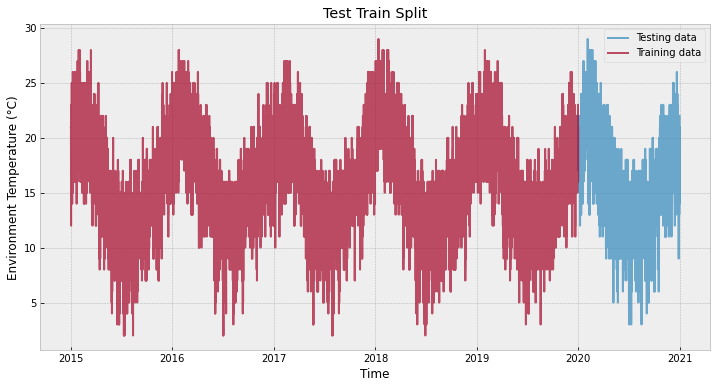

In [253]:
# split data into train and test sets
# data from 2020-01-01 00:00:00 amd onwards is used as test data
# remaining data from previous times in the training data

train = dataset["2015-01-01 00:00:00":"2019-12-31 23:30:00"]
test = dataset["2020-01-01 00:00:00":]
print(train.shape, test.shape)
plt.plot(test, alpha=.7, label="Testing data")
plt.plot(train, alpha=.7, label="Training data")

plt.legend()
plt.title("Test Train Split")
plt.xlabel('Time')
plt.ylabel('Environment Temperature (°C)')
plt.rcParams['figure.figsize'] = [12, 6]
plt.show()

## Reason for changes
- ` station` column is removed because they are all from NZAA
- `gust` column is removed because there is not sufficient data matching with other data
    - only using other data where gust was recorded as well will waste much of the data we have
- `peak_wind_drct` column is removed since there is no data in this column
- `valid` column dropped in favour of `series` column 
  - `series` is numerical data representing time which can be read by models
- The dataset is reduced to the columns `series` and `tmpc` to be used in the model

# Data Modelling

## Order for ARIMA Model
- The model I use is the ARIMA model (Auto Regression Integrated Moving Average) for time series forecasting
- The cell below will try different combinations of orders to find a best model which was found to be:
  - Best model:  ARIMA(2,1,4)(0,0,0)
- I do not recommend running the cell below because it takes very long and is not strictly necessary since best model order can be manually input now.

In [55]:
from pmdarima import auto_arima
# (5,1,0)
stepwise_fit = auto_arima(dataset, trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=217601.888, Time=34.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=223736.071, Time=4.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=223178.398, Time=4.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=223303.771, Time=5.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=223734.071, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=217745.186, Time=22.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=50.61 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=213224.560, Time=89.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=217918.257, Time=32.41 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=210035.133, Time=104.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=217733.115, Time=33.41 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=216850.949, Time=126.12 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=119.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=216860.065, Time=102.76 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               103713
Model:               SARIMAX(2, 1, 4)   Log Likelihood             -104564.946
Date:                Tue, 09 Aug 2022   AIC                         209143.893
Time:                        06:09:02   BIC                         209210.738
Sample:                             0   HQIC                        209164.146
                             - 103713                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9715      0.001   3486.958      0.000       1.970       1.973
ar.L2         -0.9884      0.001  -1772.321      0.000      -0.990      -0.987
ma.L1         -2.1600      0.003   -802.768      0.000      -2.165      -2.155
ma.L2          1.4206      0.006    228.450      0.000       1.408       1.433
ma.L3         -0.2922      0.006    -46.763      0.000      -0.304      -0.280
ma.L4          0.0403      0.003     14.876      0.000       0.035       0.046
sigma2         0.4398      0.001    317.589      0.000       0.437       0.443
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):             17053.22
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.15
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [299]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
# fit model on training data with 30min frequencies
warnings.filterwarnings("ignore")
train = train.resample("30min").last()
model = ARIMA(train, order=(2,1,4), freq="30min")
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tmpc   No. Observations:                87648
Model:                 ARIMA(2, 1, 4)   Log Likelihood              -86251.466
Date:                Tue, 09 Aug 2022   AIC                         172516.933
Time:                        15:44:40   BIC                         172582.600
Sample:                    01-01-2015   HQIC                        172536.980
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9613      0.001   2313.520      0.000       1.960       1.963
ar.L2         -0.9778      0.001  -1183.323      0.000      -0.979      -0.976
ma.L1         -2.1501      0.003   -706.896      0.000      -2.156      -2.144
ma.L2          1.4046      0.007    203.387      0.000       1.391       1.418
ma.L3         -0.2830      0.007    -40.859      0.000      -0.297      -0.269
ma.L4          0.0354      0.003     11.736      0.000       0.030       0.041
sigma2         0.4302      0.002    281.630      0.000       0.427       0.433
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):             12343.58
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [271]:
# predict on test set
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end, typ="levels")
print(pred)

2020-01-01 00:00:00    21.140944
2020-01-01 00:30:00    21.223775
2020-01-01 01:00:00    21.268640
2020-01-01 01:30:00    21.276634
2020-01-01 02:00:00    21.248441
                         ...    
2020-12-30 10:00:00    19.099346
2020-12-30 10:30:00    19.099346
2020-12-30 11:00:00    19.099346
2020-12-30 11:30:00    19.099346
2020-12-30 12:00:00    19.099346
Freq: 30T, Name: predicted_mean, Length: 17497, dtype: float64


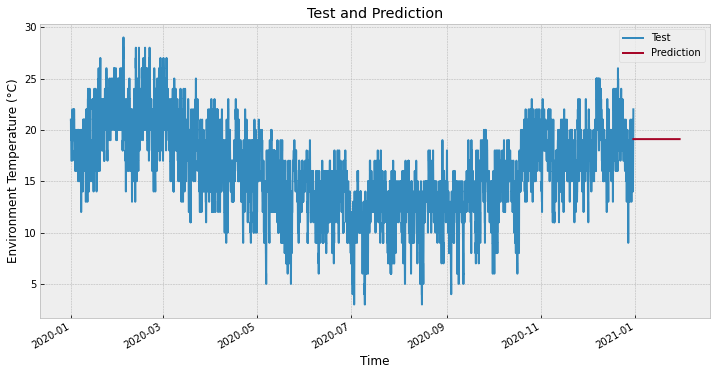

In [301]:
# plot the prediction and test set
test.plot(legend=True, label="Test")
pred.plot(legend=True, label="Prediction")
plt.rcParams['figure.figsize'] = [12, 6]
plt.title("Test and Prediction")
plt.xlabel('Time')
plt.ylabel('Environment Temperature (°C)')
plt.show()

In [303]:
# root mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt
rsme = sqrt(mean_squared_error(pred, test))
print("Test mean:  "+ str(test.mean()))
print("Root mean squared error: "+ str(rsme))

ValueError: Found input variables with inconsistent numbers of samples: [1441, 17497]

valid
2020-12-30 21:30:00    19.0
2020-12-30 22:00:00    19.0
2020-12-30 22:30:00    20.0
2020-12-30 23:00:00    20.0
2020-12-30 23:30:00    22.0
Name: tmpc, dtype: float64
--------------------
2020-12-31 00:00:00    19.099346
2020-12-31 00:30:00    19.099346
2020-12-31 01:00:00    19.099346
2020-12-31 01:30:00    19.099346
2020-12-31 02:00:00    19.099346
                         ...    
2021-01-29 22:00:00    19.099346
2021-01-29 22:30:00    19.099346
2021-01-29 23:00:00    19.099346
2021-01-29 23:30:00    19.099346
2021-01-30 00:00:00    19.099346
Freq: 30T, Name: predicted_mean, Length: 1441, dtype: float64


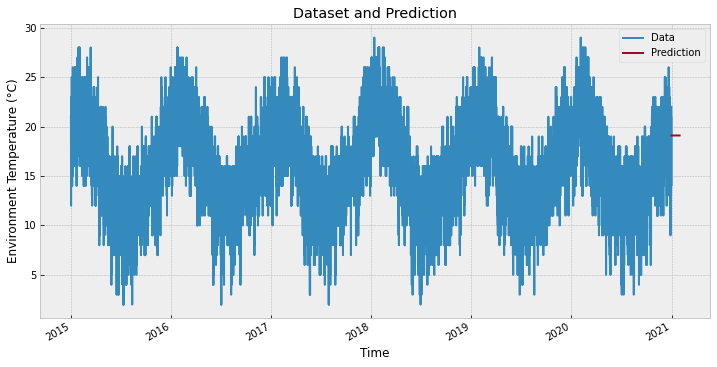

In [298]:
# forecast on next month of temperatures after final date on dataset
print(dataset.tail())
pred=model.predict(start=len(dataset) + 1455, end=len(dataset) + 2895, typ="levels")
print("-"*20)
print(pred)
dataset.plot(legend=True, label="Data")
pred.plot(legend=True, label="Prediction")
plt.rcParams['figure.figsize'] = [12, 6]
plt.title("Dataset and Prediction")
plt.xlabel('Time')
plt.ylabel('Environment Temperature (°C)')
plt.show()

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.